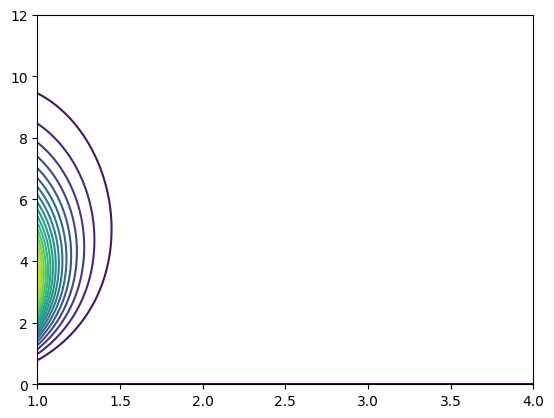

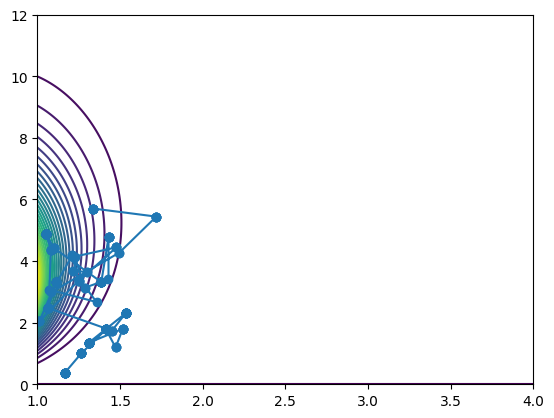

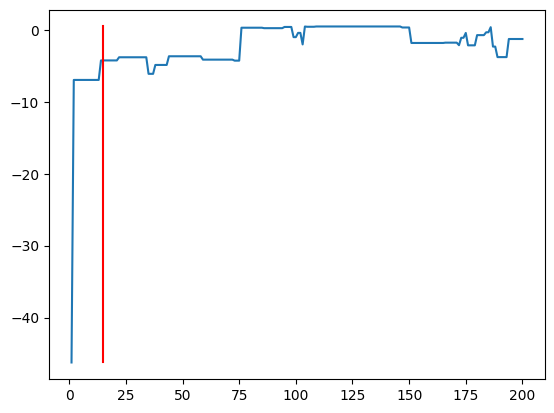

In [2]:


import matplotlib.pyplot as plt 
import numpy as np
from scipy.special import gamma as gamma_f
from scipy.stats import multivariate_normal as normal
from scipy.stats import norm as norm1
from scipy.stats import gamma
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf



"""
Función Objtevido del primer ejercicio.
"""
def f1(alfa,beta,n,r1,r2):
    if 1 < alfa and alfa < 4 and beta > 0 :
        return (((beta**alfa)/gamma_f(alfa))**n)*(r1**(alfa-1))*np.exp(-beta*(r2+1))
    else:
        return 0




"""
Ejercicio 1 para n = 4.
"""
n = 4
sigma1 = .9
sigma2 = 1
np.random.seed(81319)
muestra_gamma = np.random.gamma(size = n,scale =1/100, shape = 3)
# Generamos una muestra de v.a. Bernoulli(1/3) con el método desarrollado en
# el ejercicio 1.
r1 = np.prod(muestra_gamma)
r2 = sum(muestra_gamma)


"""
Contornos de la función objetivo para n=4.
"""
fig = plt.figure()
ax = fig.add_subplot(111)

alfa =  np.linspace(1, 4, 1000)
beta = np.linspace(0, 12,1000)
ALFA,BETA = np.meshgrid(alfa,beta)
Z = (((BETA**ALFA)/gamma_f(ALFA))**n)*(r1**(ALFA-1))*np.exp(-BETA*(r2+1))
ax.contour(ALFA,BETA,Z,20)
plt.show()


""" 
Algoritmo M-H ejercicio 1.
"""
m  = 10000
# Número de iteraciones de la cadena de Markov en el algoritmo de M-H.

xt = [np.random.uniform(low=1,high = 4),np.random.exponential(scale=1)]
# La distribución inicial es uniforme en (0,1/2).
muestra =[[],[]]
# En esta lista guardaremos la cadena de Markov generada por M-H.
for i in range(m):
# Algoritmo de M-H.
    yt = xt +   normal.rvs(mean = (0,0),cov = np.array([[sigma1,0],[0,sigma2]]))
    # Generamos de la propuesta.
    rho = min(1,(f1(yt[0],yt[1],n,r1,r2))/(f1(xt[0],xt[1],n,r1,r2)))
    # Calculamos la probabilidad de aceptar.
    if np.random.uniform() <= rho:
    # En caso de aceptar, el valor de la cadena es ahora el generado en la
    # propuesta.
        xt = yt
    muestra[0].append(xt[0])
    muestra[1].append(xt[1])
    
     
"""
Evolución de la cadena
"""
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(ALFA,BETA,Z,30)
plt.plot(muestra[0][1:200],muestra[1][1:200],marker = 'o')
plt.show()


"""
Burn-in
"""
log_objetivo_f1 = []
for i in range(200):
    log_objetivo_f1.append(np.log(f1(muestra[0][i],muestra[1][i],n,r1,r2)))
plt.plot(list(range(1,201)), log_objetivo_f1)
plt.plot((15,15),(min(log_objetivo_f1),max(log_objetivo_f1)),color = 'red')


















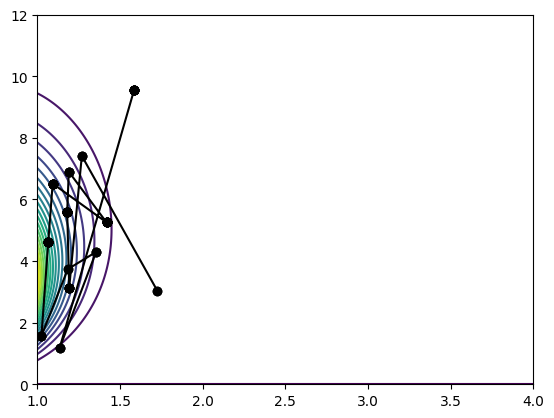

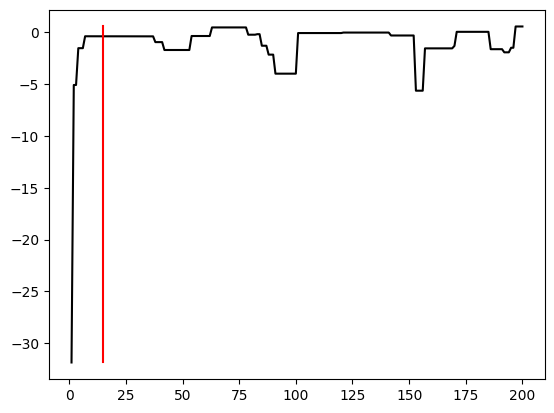

In [3]:

""" 
Algoritmo M-H ejercicio 1 con propuesta propia.
"""
m  = 10000
# Número de iteraciones de la cadena de Markov en el algoritmo de M-H.

xt = [np.random.uniform(low=1,high = 4),np.random.exponential(scale=1)]
# La distribución inicial es uniforme en (0,1/2).
muestra =[[],[]]
# En esta lista guardaremos la cadena de Markov generada por M-H.
for i in range(m):
# Algoritmo de M-H.
    yt = [xt[0] + np.random.normal(loc = 0,scale = sigma1),
          np.random.normal(loc = 4.5,scale = 2.5)]   
    # Generamos de la propuesta.
    rho = min(1,(f1(yt[0],yt[1],n,r1,r2)*norm1.pdf(xt[1],loc = 4.5,scale = 2.5))/(f1(xt[0],xt[1],n,r1,r2)*norm1.pdf(yt[1],loc = 4.5,scale = 2.5)))
    # Calculamos la probabilidad de aceptar.
    if yt[0] < 0 or yt[1] < 0:
        rho = 0
    if np.random.uniform() <= rho:
    # En caso de aceptar, el valor de la cadena es ahora el generado en la
    # propuesta.
        xt = yt
    muestra[0].append(xt[0])
    muestra[1].append(xt[1])
    
     
"""
Evolución de la cadena
"""
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(ALFA,BETA,Z,20)
plt.plot(muestra[0][1:100],muestra[1][1:100],marker = 'o',color = 'black')
plt.show()


"""
Burn-in
"""
k = 200
log_objetivo_f1 = []
for i in range(k):
    log_objetivo_f1.append(np.log(f1(muestra[0][i],muestra[1][i],n,r1,r2)))
plt.plot(list(range(1,k+1)), log_objetivo_f1,color = "black")
plt.plot((15,15),(min(log_objetivo_f1),max(log_objetivo_f1)),color = 'red')





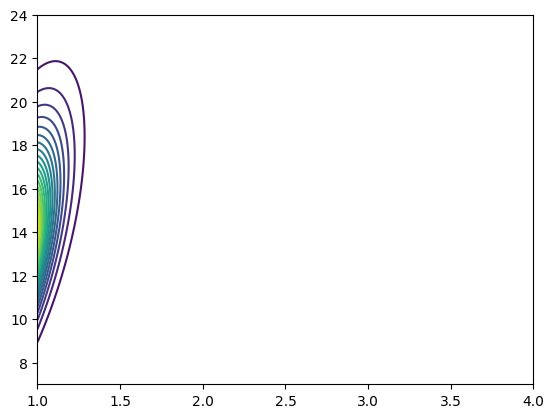

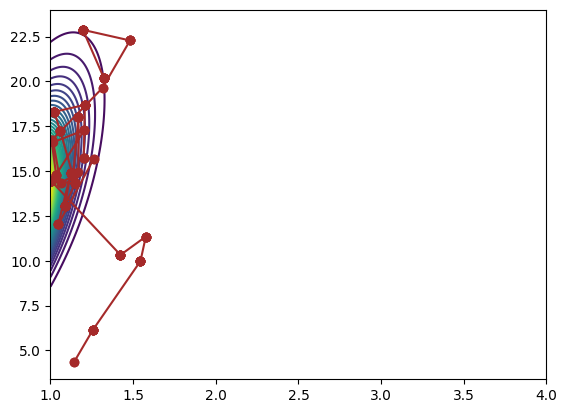

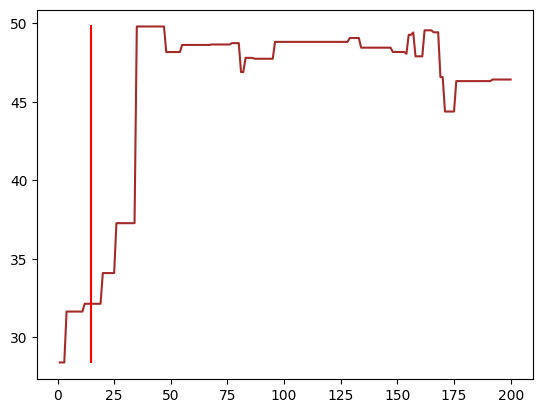

In [4]:

"""
Ejercicio 1 para n = 30.
"""
n = 30
sigma1 = .5
sigma2 = 5.12
np.random.seed(81319)
muestra_gamma = np.random.gamma(size = n,scale =1/100, shape = 3)
# Generamos una muestra de v.a. Bernoulli(1/3) con el método desarrollado en
# el ejercicio 1.
r1 = np.prod(muestra_gamma)
r2 = sum(muestra_gamma)


"""
Contornos de la función objetivo para n=4.
"""
fig = plt.figure()
ax = fig.add_subplot(111)

alfa =  np.linspace(1, 4, 1000)
beta = np.linspace(7, 24,1000)
ALFA,BETA = np.meshgrid(alfa,beta)
Z = (((BETA**ALFA)/gamma_f(ALFA))**n)*(r1**(ALFA-1))*np.exp(-BETA*(r2+1))
ax.contour(ALFA,BETA,Z,20)
plt.show()


""" 
Algoritmo M-H ejercicio 1.
"""
m  = 10000
# Número de iteraciones de la cadena de Markov en el algoritmo de M-H.

xt = [np.random.uniform(low=1,high = 4),np.random.exponential(scale=1)]
# La distribución inicial es uniforme en (0,1/2).
muestra =[[],[]]
# En esta lista guardaremos la cadena de Markov generada por M-H.
for i in range(m):
# Algoritmo de M-H.
    yt = xt +   normal.rvs(mean = (0,0),cov = np.array([[sigma1,0],[0,sigma2]]))
    # Generamos de la propuesta.
    rho = min(1,(f1(yt[0],yt[1],n,r1,r2))/(f1(xt[0],xt[1],n,r1,r2)))
    # Calculamos la probabilidad de aceptar.
    if np.random.uniform() <= rho:
    # En caso de aceptar, el valor de la cadena es ahora el generado en la
    # propuesta.
        xt = yt
    muestra[0].append(xt[0])
    muestra[1].append(xt[1])
    
     
"""
Evolución de la cadena
"""
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(ALFA,BETA,Z,30)
plt.plot(muestra[0][1:200],muestra[1][1:200],marker = 'o',color = 'brown')
plt.show()


"""
Burn-in
"""
log_objetivo_f1 = []
for i in range(200):
    log_objetivo_f1.append(np.log(f1(muestra[0][i],muestra[1][i],n,r1,r2)))
plt.plot(list(range(1,201)), log_objetivo_f1,color = 'brown')
plt.plot((15,15),(min(log_objetivo_f1),max(log_objetivo_f1)),color = 'red')



/tmp/ipykernel_33/2099032125.py:149: RuntimeWarning: overflow encountered in exp
  rho = min(1,np.exp( (1/2)*( (xt-mu).T @ SIGMA_INV @ (xt-mu) -


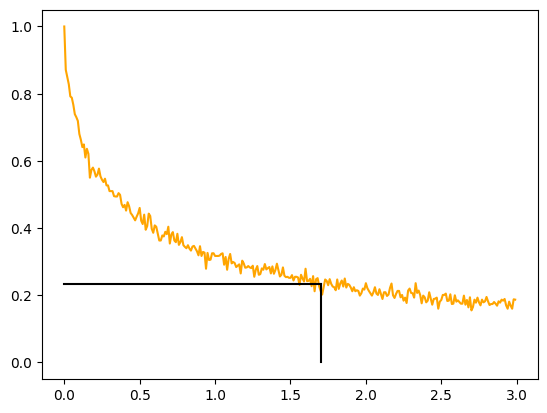

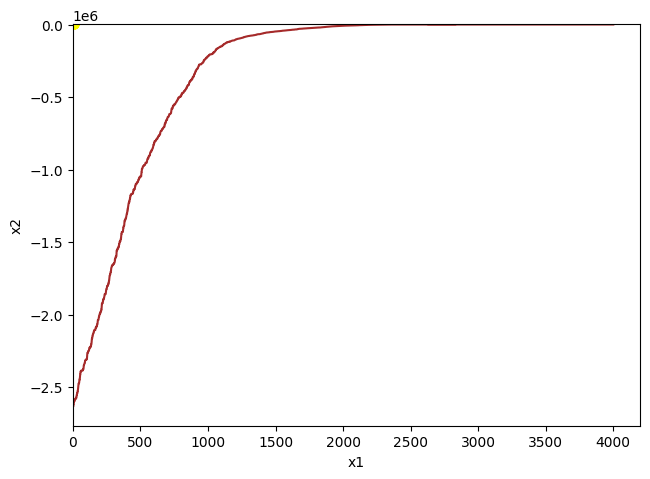

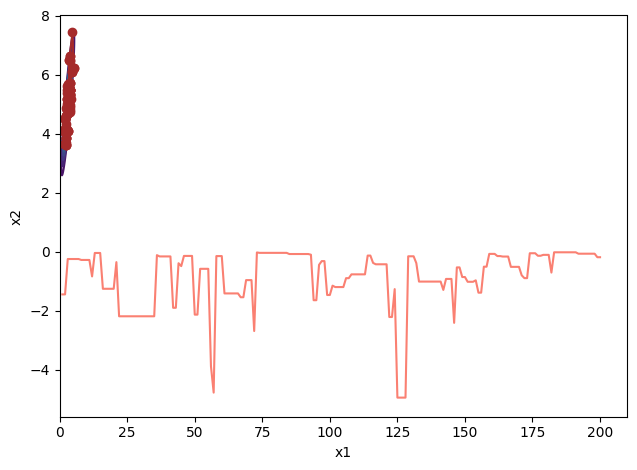

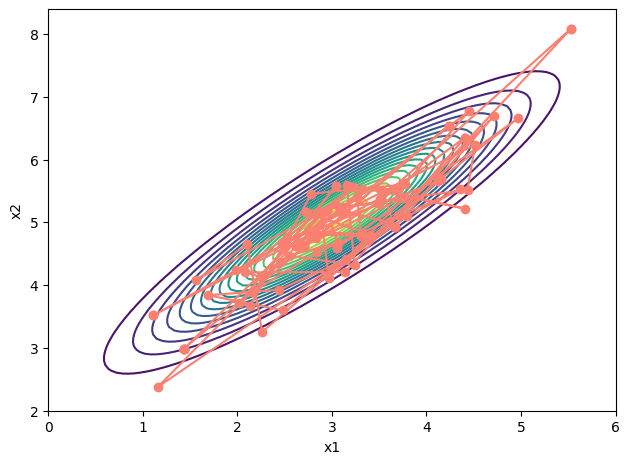

In [11]:
""" 
Algoritmo M-H ejercicio 3. Elección de sigma
"""
SIGMA = np.array([[1,.9],[.9,1]])
# Matriz de Varianzas de la distrinución objetivo
SIGMA_INV = np.linalg.inv(SIGMA)
# Inversa de SIGMA
mu = np.array([3.0,5.0])
# Media de la distribución objetivo
ratio = 300*[0.0]
sig=[]
for j in range(300):       
    sig.append(j/100)
    # Parámetro de froma de la Gamma objetivo.
    m  = 1000
    # Número de iteraciones de la cadena de Markov en el algoritmo de M-H.
    
    xt = normal.rvs(mean = mu, cov = np.diag([sig[j],sig[j] ]))
    # La distribución inicial es uniforme en (0,1/2).
    muestra =[[],[]]
    # En esta lista guardaremos la cadena de Markov generada por M-H.
    for i in range(m):
    # Algoritmo de M-H.
        yt = xt + normal.rvs( mean = (0.0,0.0),cov = np.diag([sig[j],sig[j] ]))
        # Generamos de la propuesta.
        rho = min(1,np.exp( (1/2)*( (xt-mu).T @ SIGMA_INV @ (xt-mu) -
                                        (yt-mu).T @ SIGMA_INV @ (yt-mu) ) ) )
        # Calculamos la probabilidad de aceptar.
        if np.random.uniform() <= rho:
        # En caso de aceptar, el valor de la cadena es ahora el generado en la
        # propuesta.
            xt = yt
            ratio[j] = ratio[j] + 1
        muestra[0].append(xt[0])
        muestra[1].append(xt[1])
    ratio[j] = ratio[j]/m    

"""
 plot de sigma v.s. ratio de aceptación.
"""
plt.plot(sig,ratio,color = "orange")
plt.plot((0,1.7),(.234,.234),color = 'black')
plt.plot((1.7,1.7),(0,.234),color = 'black')




""" 
Algoritmo M-H ejercicio 3. Con el sigma = 1.7 elegido.
"""
SIGMA = np.array([[1,.9],[.9,1]])
# Matriz de Varianzas de la distrinución objetivo
SIGMA_INV = np.linalg.inv(SIGMA)
# Inversa de SIGMA
mu = np.array([3.0,5.0])
# Media de la distribución objetivo
sigma = 1.7
# valor de sigma elegido.
m  = 10000
# Número de iteraciones de la cadena de Markov en el algoritmo de M-H.
xt = normal.rvs(mean = mu, cov = np.diag([sigma,sigma ]))
# La distribución inicial es normal.
muestra =[[],[]]
# En esta lista guardaremos la cadena de Markov generada por M-H.
for i in range(m):
# Algoritmo de M-H.
    yt = xt + normal.rvs( mean = (0.0,0.0),cov = np.diag([sigma,sigma]))
    # Generamos de la propuesta.
    rho = min(1,np.exp( (1/2)*( (xt-mu).T @ SIGMA_INV @ (xt-mu) -
                                    (yt-mu).T @ SIGMA_INV @ (yt-mu) ) ) )
    # Calculamos la probabilidad de aceptar.
    if np.random.uniform() <= rho:
    # En caso de aceptar, el valor de la cadena es ahora el generado en la
    # propuesta.
        xt = yt
    muestra[0].append(xt[0])
    muestra[1].append(xt[1]) 


"""
Contornos de la función objetivo.
"""

fig = plt.figure()
 
# Generating a meshgrid complacent with
# the 3-sigma boundary
mean_1, mean_2 = mu[0], mu[1]
sigma_1, sigma_2 = SIGMA[0,0], SIGMA[1,1]
 
x = np.linspace(-3*sigma_1 + mean_1, 3*sigma_1 + mean_1, num=100)
y = np.linspace(-3*sigma_2 + mean_2, 3*sigma_2 + mean_2, num=100)
X, Y = np.meshgrid(x,y)
distr = normal(cov = SIGMA, mean = mu)
# Generating the density function
# for each point in the meshgrid
pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
 
# Plotting the density function values
 
# Plotting contour plots
#fig.add_subplot(111)
plt.subplot(111)
plt.contour(X, Y, pdf,20)
plt.xlabel("x1")
plt.ylabel("x2")
plt.tight_layout()

"""
Evolucion de la cadena.
"""
plt.plot(muestra[0][1:100],muestra[1][1:100],marker = 'o',color = 'yellow')

"""
Según la teoría, con ese ratio de rechazo optimo, el lag debería de ser de 
3. Hacemos Burn-in de 2
"""
muestra[0] = muestra[0][2::3]
muestra[1] = muestra[1][2::3]




""" 
Algoritmo M-H ejercicio 3. Con el sigma = 1.7 elegido y además con un
valor inicial de la cadena (1000,1)
"""
SIGMA = np.array([[1,.9],[.9,1]])
# Matriz de Varianzas de la distrinución objetivo
SIGMA_INV = np.linalg.inv(SIGMA)
# Inversa de SIGMA
mu = np.array([3.0,5.0])
# Media de la distribución objetivo
sigma = 1.7
# valor de sigma elegido.
m  = 10000
# Número de iteraciones de la cadena de Markov en el algoritmo de M-H.
xt = np.array([1000,1])
# La distribución inicial es normal.
muestra =[[],[]]
# En esta lista guardaremos la cadena de Markov generada por M-H.
for i in range(m):
# Algoritmo de M-H.
    yt = xt + normal.rvs( mean = (0.0,0.0),cov = np.diag([sigma,sigma]))
    # Generamos de la propuesta.
    rho = min(1,np.exp( (1/2)*( (xt-mu).T @ SIGMA_INV @ (xt-mu) -
                                    (yt-mu).T @ SIGMA_INV @ (yt-mu) ) ) )
    # Calculamos la probabilidad de aceptar.
    if np.random.uniform() <= rho:
    # En caso de aceptar, el valor de la cadena es ahora el generado en la
    # propuesta.
        xt = yt
    muestra[0].append(xt[0])
    muestra[1].append(xt[1]) 

"""
Brun-in 
"""
log_objetivo_ejer3 = []
for i in range(4000):
    log_objetivo_ejer3.append( -(1/2)*(np.array([muestra[0][i],muestra[1][i]])-mu).T @ SIGMA_INV @ (np.array([muestra[0][i],muestra[1][i]])-mu)  )
plt.plot(list(range(1,4001)), log_objetivo_ejer3,color = 'brown')
#plt.plot((15,15),(min(log_objetivo_f1),max(log_objetivo_f1)),color = 'red')
plt.plot(np.array(list(range(1,201)))+2630, log_objetivo_ejer3[2630:2830],color = 'brown')

"""
Según la teoría, con ese ratio de rechazo optimo, el lag debería de ser de 
3. Hacemos Burn-in de 2560.
"""
muestra[0] = muestra[0][2700::3]
muestra[1] = muestra[1][2700::3]


"""
Contornos de la función objetivo.
"""

fig = plt.figure()
 
# Generating a meshgrid complacent with
# the 3-sigma boundary
mean_1, mean_2 = mu[0], mu[1]
sigma_1, sigma_2 = SIGMA[0,0], SIGMA[1,1]
 
x = np.linspace(-3*sigma_1 + mean_1, 3*sigma_1 + mean_1, num=100)
y = np.linspace(-3*sigma_2 + mean_2, 3*sigma_2 + mean_2, num=100)
X, Y = np.meshgrid(x,y)
distr = normal(cov = SIGMA, mean = mu)
# Generating the density function
# for each point in the meshgrid
pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
 
# Plotting the density function values
 
# Plotting contour plots
#fig.add_subplot(111)
plt.subplot(111)
plt.contour(X, Y, pdf,20)
plt.xlabel("x1")
plt.ylabel("x2")
plt.tight_layout()

"""
Evolucion de la cadena.
"""
plt.plot(muestra[0][1:100],muestra[1][1:100],marker = 'o',color = 'brown')





""" 
Algoritmo M-H ejercicio 3. Con el sigma = 1.3 y propuesta alternativa
"""
SIGMA = np.array([[1,.9],[.9,1]])
# Matriz de Varianzas de la distrinución objetivo
SIGMA_INV = np.linalg.inv(SIGMA)
# Inversa de SIGMA
mu = np.array([3.0,5.0])
# Media de la distribución objetivo
sigma = 1.3
# valor de sigma.
m  = 10000
# Número de iteraciones de la cadena de Markov en el algoritmo de M-H.
xt = normal.rvs( mean = mu,cov = np.diag([sigma,sigma]))
#xt= (1000,1)
# La distribución inicial es normal.
muestra =[[],[]]
# En esta lista guardaremos la cadena de Markov generada por M-H.
for i in range(m):
# Algoritmo de M-H.
    yt = normal.rvs( mean = mu,cov = np.diag([sigma,sigma]))
    # Generamos de la propuesta.
    rho = min(1,np.exp( (1/2)*( (xt-mu).T @ SIGMA_INV @ (xt-mu) -
                                    (yt-mu).T @ SIGMA_INV @ (yt-mu) ) +
                       (1/(2*(sigma**2)))*( (yt-mu).T  @ (yt-mu) -
                             (xt-mu).T @ (xt-mu) ) ) ) 
    # Calculamos la probabilidad de aceptar.
    if np.random.uniform() <= rho:
    # En caso de aceptar, el valor de la cadena es ahora el generado en la
    # propuesta.
        xt = yt
    muestra[0].append(xt[0])
    muestra[1].append(xt[1]) 

"""
Brun-in 
"""
log_objetivo_ejer3 = []
for i in range(200):
    log_objetivo_ejer3.append( -(1/2)*(np.array([muestra[0][i],muestra[1][i]])-mu).T @ SIGMA_INV @ (np.array([muestra[0][i],muestra[1][i]])-mu)  )
plt.plot(list(range(1,201)), log_objetivo_ejer3,color = 'salmon')

"""
Según la teoría, con ese ratio de rechazo optimo, el lag debería de ser de 
3. Hacemos Burn-in de 2560.
"""
muestra[0] = muestra[0][10::3]
muestra[1] = muestra[1][10::3]


"""
Contornos de la función objetivo.
"""

fig = plt.figure()
 
# Generating a meshgrid complacent with
# the 3-sigma boundary
mean_1, mean_2 = mu[0], mu[1]
sigma_1, sigma_2 = SIGMA[0,0], SIGMA[1,1]
 
x = np.linspace(-3*sigma_1 + mean_1, 3*sigma_1 + mean_1, num=100)
y = np.linspace(-3*sigma_2 + mean_2, 3*sigma_2 + mean_2, num=100)
X, Y = np.meshgrid(x,y)
distr = normal(cov = SIGMA, mean = mu)
# Generating the density function
# for each point in the meshgrid
pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
 
# Plotting the density function values
 
# Plotting contour plots
#fig.add_subplot(111)
plt.subplot(111)
plt.contour(X, Y, pdf,20)
plt.xlabel("x1")
plt.ylabel("x2")
plt.tight_layout()

"""
Evolucion de la cadena.
"""
plt.plot(muestra[0][1:100],muestra[1][1:100],marker = 'o',color = 'salmon')
